In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (맑은고딕 or 나눔고딕)
plt.rc('font', family='Malgun Gothic')  # Windows (맑은고딕)
# plt.rc('font', family='NanumGothic')  # Mac/Linux (나눔고딕 필요 시 사용)

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 모든 열을 출력할 수 있도록 설정
pd.set_option("display.max_columns", None)

# 저장된 피클 파일 불러오기
pkl_data = "dataset0222.pkl"
df_data = pd.read_pickle(pkl_data)

print(df_data.shape[0])
# 데이터 확인
df_data.head()


515083


,접수연도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,주소,위도,경도,geometry,건물명,계약일,실거래가,평당가격,건물면적,건물평수,면적구분,토지면적,층,건축년도,건물용도,건물면적정수,이전실거래가,자치구최근6개월거래량,자치구최근6개월평균금액,동최근6개월거래량,동최근6개월평균금액,기준금리,계약연월,고정형주택담보대출,서울5대학군지여부,수도권아파트입주물량,한강변여부,최근접역,최근접역_노선,최근접역_연결역개수,최근접역_환승역구분,최근접역_직선거리
0,2020,11290,성북구,13600,하월곡동,222,0,서울특별시 성북구 하월곡동 222,37.607033,127.038366,POINT (127.0383656 37.6070327),월곡두산위브,2020-01-01,61900,2409.6968,84.77,25.69,중형,35.587133,11,2003.0,아파트,84,65300.00,4192,44427.6880,893,40519.3953,1.25,202001,2.42,0,12532,0,월곡,[6호선],1,일반역,0.664071
1,2020,11380,은평구,10400,갈현동,432,7,서울특별시 은평구 갈현동 432-7,37.620439,126.916566,POINT (126.9165662 37.6204386),"거성리젠시(103,104동)",2020-01-01,34000,2010.0322,55.82,16.92,소형,32.770000,3,2017.0,연립다세대,55,44060.95,4198,44464.0510,1307,40554.1232,1.25,202001,2.42,0,12532,0,연신내,"[3호선, 6호선]",2,환승역,0.514208
2,2020,11620,관악구,10100,봉천동,635,368,서울특별시 관악구 봉천동 635-368,37.487369,126.941912,POINT (126.9419124 37.4873693),동신빌,2020-01-01,31000,2294.2364,44.59,13.51,소형,29.810000,5,2016.0,연립다세대,44,33300.00,3424,47165.7564,1373,41254.2535,1.25,202001,2.42,0,12532,0,봉천,[2호선],1,일반역,0.555815
3,2020,11350,노원구,10300,공릉동,747,0,서울특별시 노원구 공릉동 747,37.620935,127.079878,POINT (127.0798784 37.6209348),두산힐스빌아파트,2020-01-01,52000,2021.2014,84.90,25.73,중형,51.054300,1,2000.0,아파트,84,58500.00,2689,35200.7107,743,26283.1252,1.25,202001,2.42,0,12532,0,화랑대,[6호선],1,일반역,0.542655
4,2020,11470,양천구,10200,목동,941,0,서울특별시 양천구 목동 941,37.532181,126.866836,POINT (126.8668363 37.5321813),대원칸타빌2,2020-01-01,98000,3805.6013,84.98,25.75,중형,42.885200,14,2003.0,아파트,84,103000.00,3260,35860.0610,1324,41265.8399,1.25,202001,2.42,1,12532,0,목동,[5호선],1,일반역,0.711087


In [2]:
def plot_avg_floor_by_district(df):
    avg_floors = df.groupby('자치구명')['층'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_floors.index, y=avg_floors.values)
    plt.xticks(rotation=45)
    plt.title('자치구별 평균 층수 (내림차순 정렬)')
    plt.xlabel('자치구')
    plt.ylabel('평균 층수')
    plt.show()

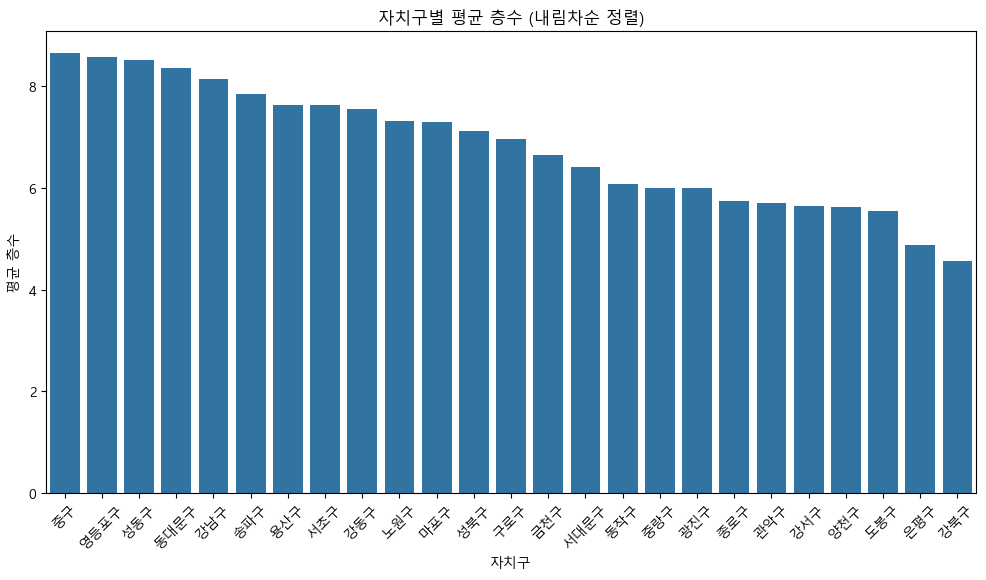

In [3]:
plot_avg_floor_by_district(df_data)

In [4]:

def plot_floor_distribution_by_district(df):
    # 자치구별 30층 이상 건물 수와 전체 건물 수 계산
    high_floor_counts = df[df['층'] >= 30].groupby('자치구명')['층'].count()
    total_counts = df.groupby('자치구명')['층'].count()
    high_floor_ratio = (high_floor_counts / total_counts).fillna(0) * 100  # 비율 계산
    
    # 30층 이상 건물 비율 높은 순으로 정렬
    sorted_districts = high_floor_ratio.sort_values(ascending=False).index.tolist()
    
    plt.figure(figsize=(15, 6))
    ax = sns.boxplot(data=df, x='자치구명', y='층', order=sorted_districts, showfliers=False)
    
    # 30층 이상 건물 비율 텍스트 추가 (X축 라벨 바로 아래에 표시)
    for i, district in enumerate(sorted_districts):
        ratio = high_floor_ratio.get(district, 0)
        ax.text(i, df['층'].min() - (df['층'].max() * 0.1), f'{ratio:.1f}%', 
                ha='center', fontsize=10, color='red')
    
    plt.xticks(rotation=45)
    plt.title('자치구별 총 건물의 층 비율 ( 고층건물(30층 이상) 비율 기준 정렬)')
    plt.xlabel('자치구')
    plt.ylabel('층')
    plt.show()

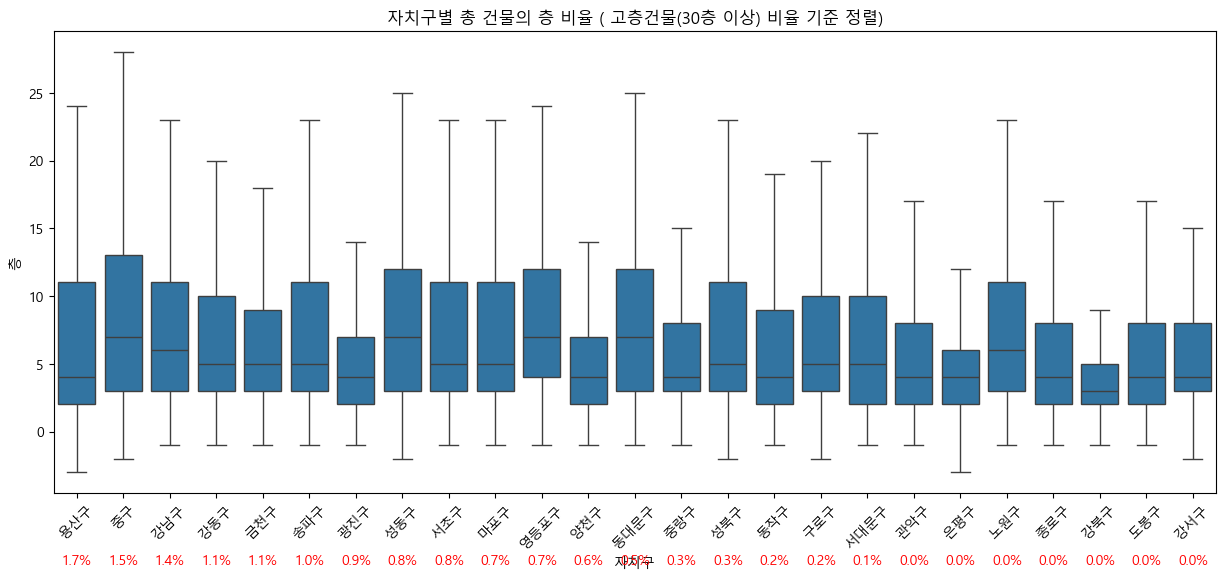

In [5]:
#  자치구별 총 건물의 층 비율 시각화
#  자치구별로 건물 층수가 어떻게 분포되어 있는지를 보여줌. (예: 어느 층수가 가장 많고, 최대/최소 층수는 몇 층인지 등)
# 자치구별 건물 층수의 차이를 볼 수 있음
plot_floor_distribution_by_district(df_data)

In [10]:
def plot_floor_distribution_by_year_and_district(df):
    df_filtered = df[df['접수연도'] != 2019]  # 2019년도 데이터 제외
    
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df_filtered, x='접수연도', y='층', hue='자치구명', showfliers=False)
    plt.xticks(rotation=45)
    plt.title('연도별 자치구별 건물 층 비율')
    plt.xlabel('연도')
    plt.ylabel('층')
    plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

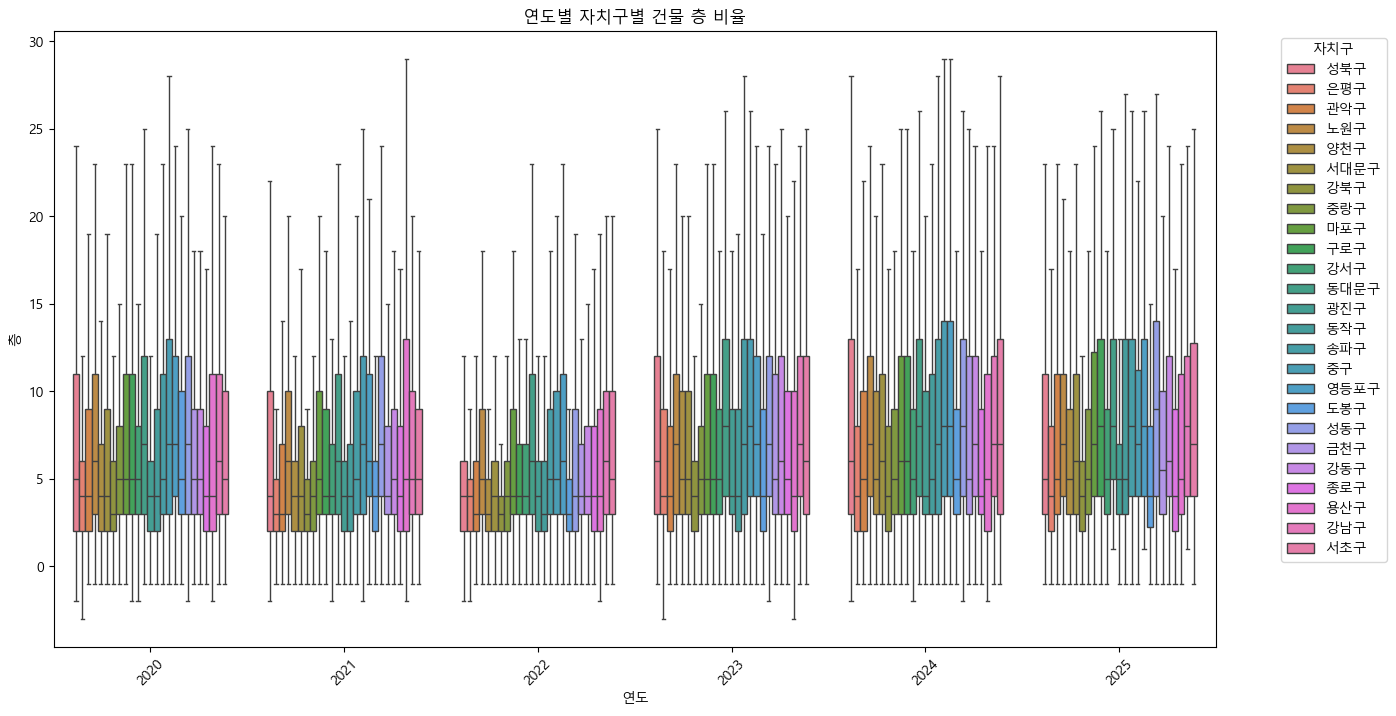

In [11]:
# 연도별 자치구별 건물 층 분포 변화 시각화
# 연도에 따라 건물 층수가 변화하는 패턴을 확인 가능
plot_floor_distribution_by_year_and_district(df_data)

In [14]:
# 건물 층 수와 실거래가 간의 관계
def plot_price_vs_floor(df):
    plt.figure(figsize=(12, 6))
    
    # 산점도
    sns.scatterplot(data=df, x='층', y='실거래가', alpha=0.5, label='실거래가 데이터')
    
    # 회귀선 (추세선)
    line = sns.regplot(data=df, x='층', y='실거래가', scatter=False, color='red')
    line_line = line.get_lines()[0]  # 회귀선 가져오기
    
    # 범례 추가
    plt.legend(handles=[line_line], labels=['회귀선'])
    
    plt.title('건물 층 수에 따른 실거래가 분포')
    plt.xlabel('층')
    plt.ylabel('실거래가')
    plt.show()


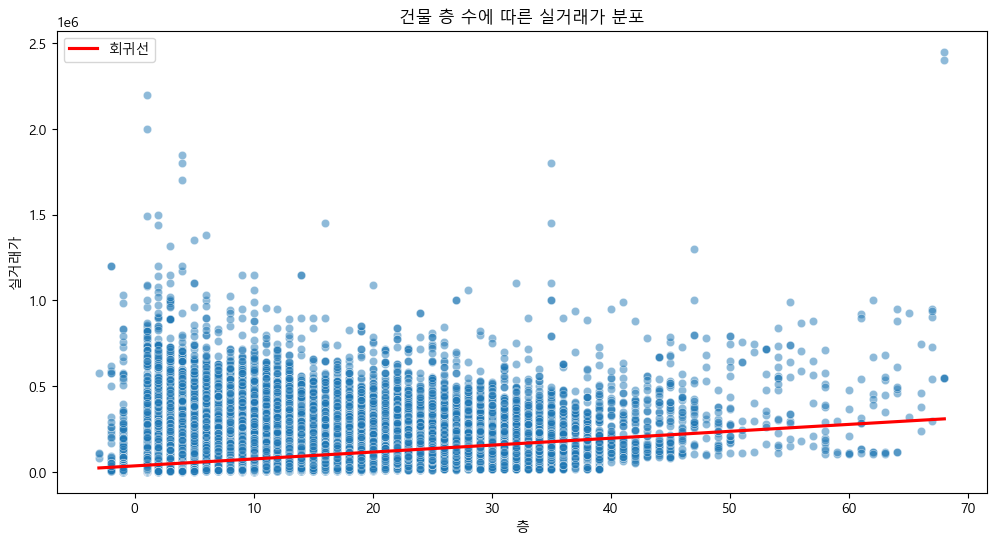

In [15]:
plot_price_vs_floor(df_data)

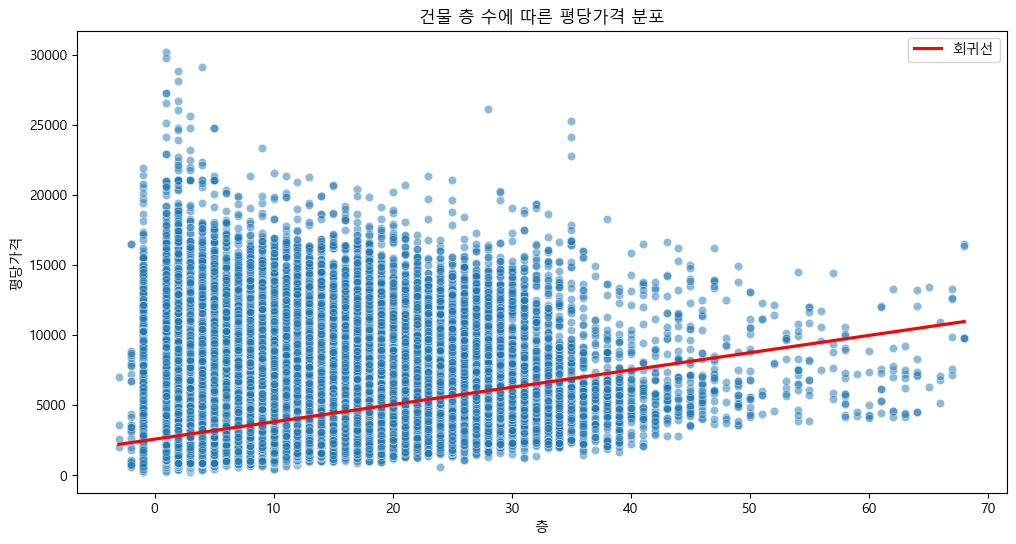

In [16]:
# 건물 층 수와 평당가격 간의 관계
def plot_unit_price_vs_floor(df):
    plt.figure(figsize=(12, 6))
    
    # 산점도
    sns.scatterplot(data=df, x='층', y='평당가격', alpha=0.5, label='평당가격 데이터')
    
    # 회귀선 (추세선)
    line = sns.regplot(data=df, x='층', y='평당가격', scatter=False, color='red')
    line_line = line.get_lines()[0]  # 회귀선 가져오기
    
    # 범례 추가
    plt.legend(handles=[line_line], labels=['회귀선'])
    
    plt.title('건물 층 수에 따른 평당가격 분포')
    plt.xlabel('층')
    plt.ylabel('평당가격')
    plt.show()
plot_unit_price_vs_floor(df_data)

In [17]:
# Box Plot (박스플롯) - 한강변 여부별 가격 분포 비교
def plot_price_vs_hangang_box(df):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='한강변여부', y='실거래가', palette=['red', 'blue'])

    plt.title('한강변 여부에 따른 실거래가 분포')
    plt.xlabel('한강변 여부')
    plt.ylabel('실거래가')
    plt.xticks(ticks=[0, 1], labels=['한강변 아님', '한강변'])
    plt.show()

# 막대 그래프 (Bar Plot)
def plot_price_vs_hangang_bar(df):
    plt.figure(figsize=(8, 5))
    avg_prices = df.groupby('한강변여부')['실거래가'].mean()  # 평균 실거래가 계산
    sns.barplot(x=avg_prices.index, y=avg_prices.values, palette=['red', 'blue'])

    plt.title('한강변 여부에 따른 평균 실거래가 비교')
    plt.xlabel('한강변 여부')
    plt.ylabel('평균 실거래가')
    plt.xticks(ticks=[0, 1], labels=['한강변 아님', '한강변'])
    plt.show()

# 밀도 그래프 (Density Plot)
# 한강변 여부에 따른 실거래가 분포를 비교하는 방법입니다.
def plot_price_vs_hangang_density(df):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[df['한강변여부'] == 1]['실거래가'], label='한강변', fill=True, color='blue', alpha=0.5)
    sns.kdeplot(df[df['한강변여부'] == 0]['실거래가'], label='한강변 아님', fill=True, color='red', alpha=0.5)

    plt.title('한강변 여부에 따른 실거래가 밀도 비교')
    plt.xlabel('실거래가')
    plt.ylabel('밀도')
    plt.legend()
    plt.show()

#  바이올린 플롯 (Violin Plot) - 가격 분포 및 밀도 비교
def plot_price_vs_hangang_violin(df):
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=df, x='한강변여부', y='실거래가', palette='coolwarm')

    plt.title('한강변 여부에 따른 실거래가 비교 (Violin Plot)')
    plt.xlabel('한강변 여부')
    plt.ylabel('실거래가')
    plt.xticks(ticks=[0, 1], labels=['한강변 아님', '한강변'])
    plt.show()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1340\794146554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='한강변여부', y='실거래가', palette=['red', 'blue'])


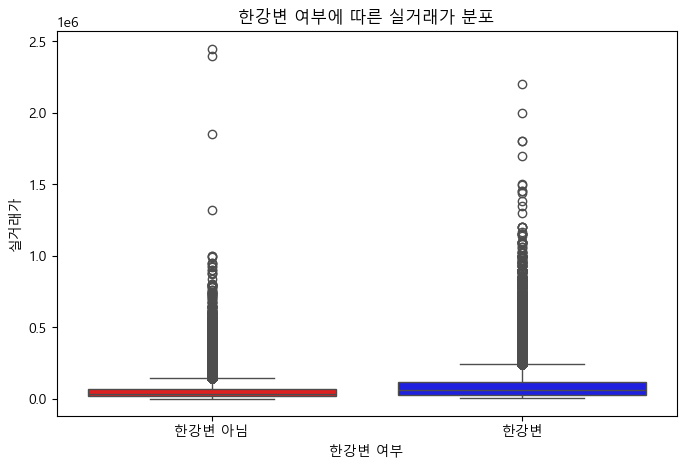

In [20]:
plot_price_vs_hangang_box(df_data)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1340\794146554.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index, y=avg_prices.values, palette=['red', 'blue'])


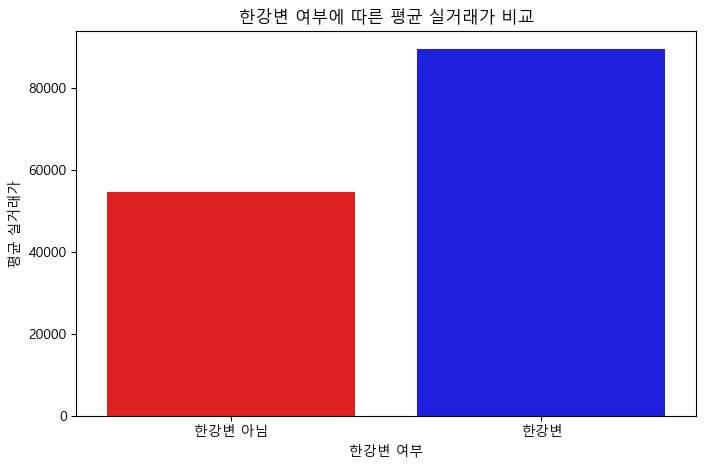

In [21]:
plot_price_vs_hangang_bar(df_data)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1340\1784843609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index, y=avg_prices.values, palette=['red', 'blue'])


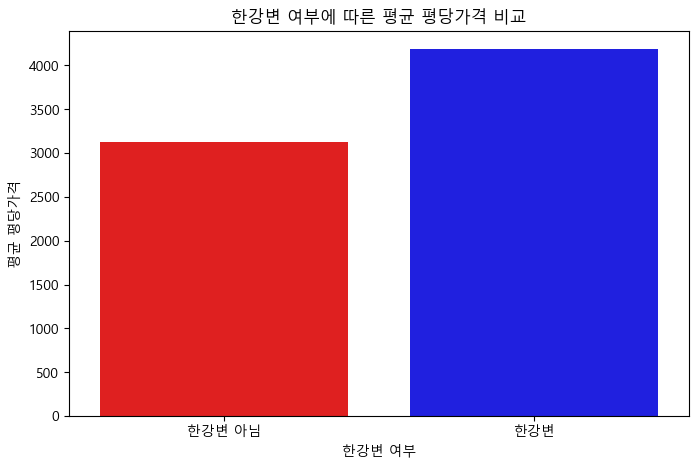

In [22]:
# 막대 그래프 평당가격 (Bar Plot)
def plot_unit_price_vs_hangang_bar(df):
    plt.figure(figsize=(8, 5))
    avg_prices = df.groupby('한강변여부')['평당가격'].mean()  # 평균 평당가격 계산
    sns.barplot(x=avg_prices.index, y=avg_prices.values, palette=['red', 'blue'])

    plt.title('한강변 여부에 따른 평균 평당가격 비교')
    plt.xlabel('한강변 여부')
    plt.ylabel('평균 평당가격')
    plt.xticks(ticks=[0, 1], labels=['한강변 아님', '한강변'])
    plt.show()
    
plot_unit_price_vs_hangang_bar(df_data)

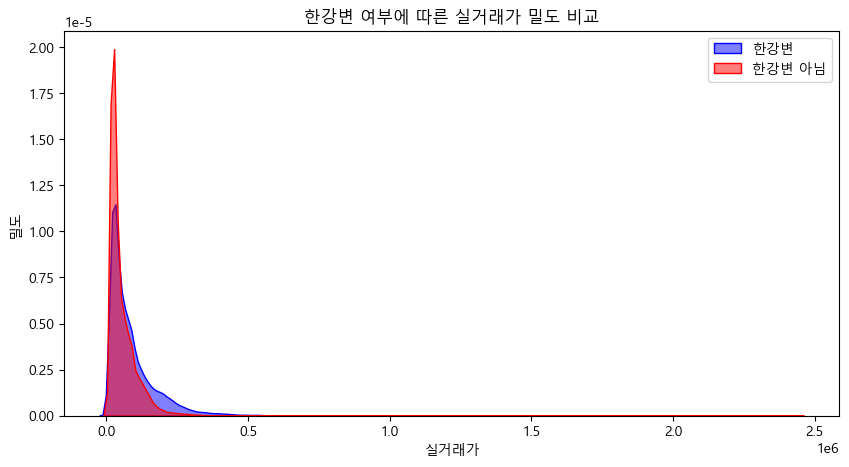

In [23]:
plot_price_vs_hangang_density(df_data)

In [24]:
def plot_price_vs_hangang_scatter(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='층', y='실거래가', hue='한강변여부', alpha=0.5, palette=['red', 'blue'])
    
    # 한강변 여부별 회귀선 추가
    sns.regplot(data=df[df['한강변여부'] == 1], x='층', y='실거래가', scatter=False, color='blue', label='한강변')
    sns.regplot(data=df[df['한강변여부'] == 0], x='층', y='실거래가', scatter=False, color='red', label='한강변 아님')
    
    plt.legend()
    plt.title('건물 층 수에 따른 실거래가 분포 (한강변 여부별)')
    plt.xlabel('층')
    plt.ylabel('실거래가')
    plt.show()

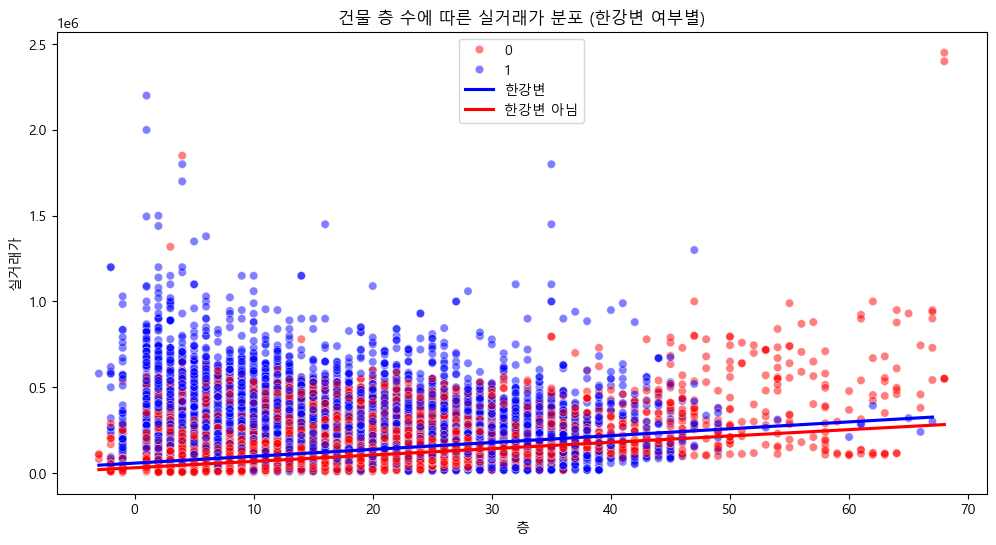

In [25]:
plot_price_vs_hangang_scatter(df_data)

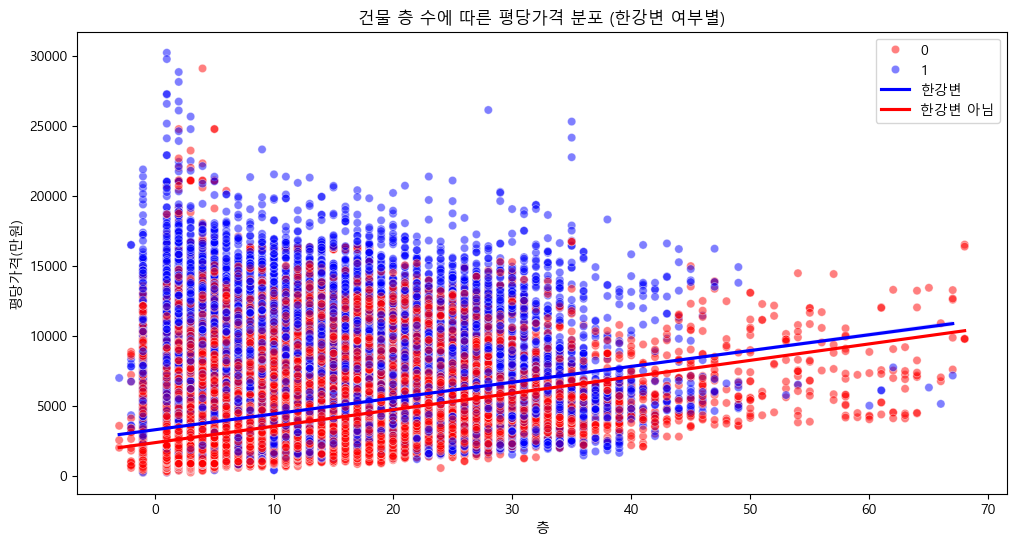

In [26]:
def plot_price_vs_hangang_scatter(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='층', y='평당가격', hue='한강변여부', alpha=0.5, palette=['red', 'blue'])
    
    # 한강변 여부별 회귀선 추가
    sns.regplot(data=df[df['한강변여부'] == 1], x='층', y='평당가격', scatter=False, color='blue', label='한강변')
    sns.regplot(data=df[df['한강변여부'] == 0], x='층', y='평당가격', scatter=False, color='red', label='한강변 아님')
    
    plt.legend()
    plt.title('건물 층 수에 따른 평당가격 분포 (한강변 여부별)')
    plt.xlabel('층')
    plt.ylabel('평당가격(만원)')
    plt.show()
plot_price_vs_hangang_scatter(df_data)